<a href="https://colab.research.google.com/github/DenZhid/TelecommunicationSystemsLabs/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Упражнений 2.1**
Прочитать пояснения и выполнить примеры в https://colab.research.google.com/github/AllenDowney/ThinkDSP/blob/master/code/chap02.ipynb

**Ход работы**

По представленной ссылке была изучена работа примеров.

In [2]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2022-03-21 11:54:43--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-03-21 11:54:43--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.01s   

2022-03-21 11:54:44 (4.65 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



#**Упражнение 2.2**

Пилообразный сигнал линейно нарастает от -1 до 1, а затем резко падает до -1 и повторяется.

Напишите класс, называемые *SawtoothSignal*, расширяющий *signal* и предоставляющий evaluate для оценки пилообразного сигнала.

Вычислите спектр пилообразного сигнала. Как соотносится его гармоническая структура с треугольным и прямоугольным 

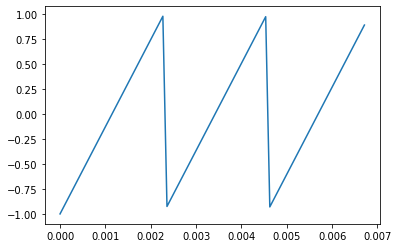

In [28]:
from thinkdsp import Sinusoid
from thinkdsp import unbias, normalize
import numpy as np

class SawtoothSignal(Sinusoid):
  
  def evaluate(self, ts):
    cycles = self.freq * ts + self.offset / np.pi / 2
    frac, _ = np.modf(cycles)
    ys = normalize(unbias(frac), self.amp)
    return ys

sawtooth_signal = SawtoothSignal()
sawtooth_signal.plot()

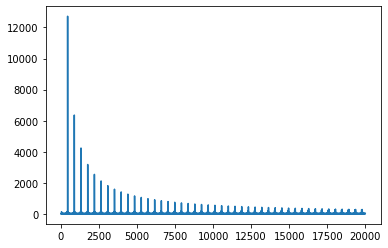

In [29]:
sawtooth_wave = sawtooth_signal.make_wave(duration=1, framerate=40000)
sawtooth_wave.make_spectrum().plot()

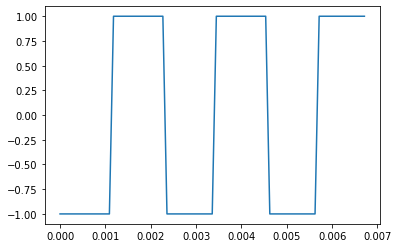

In [30]:
from thinkdsp import SquareSignal

square_signal = SquareSignal()
square_signal.plot()

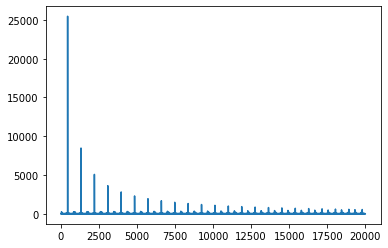

In [31]:
square_wave = square_signal.make_wave(duration=1, framerate=40000)
square_wave.make_spectrum().plot()

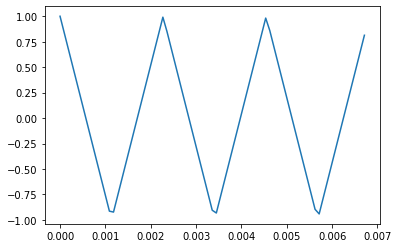

In [35]:
from thinkdsp import TriangleSignal

triangle_signal = TriangleSignal()
triangle_signal.plot()

In [36]:
triangle_wave = triangle_signal.make_wave(duration=1, framerate=40000)
triangle_wave.make_spectrum().plot

<bound method _SpectrumParent.plot of <thinkdsp.Spectrum object at 0x7f4395805210>>

#**Упражнение 2.3**

Создайте прямоугольный сигнал 1100 Гц и вычислите wave с выборками 10 000 кадров в секунду. Постройте спектр и убедитесь, что большинство гармоник "завернуты" из-за биений. Слышны ли последствия этого при проигрывании?

#**Упражнение 2.4**

Возьмите объект *Spectrum* и распечатайте несколько первых значений *spectrum.fs*. Убедитесь, что они начинаются с нуля, то есть *Spectrum.hs[0]* - амплитуда компоненты с частотой 0. Но что это значит?

Проведите такой эксперимент:


1.   Созайте треугольный сигнал с частотой 440 Гц и *wave* длительностью 0,01 секунд. Распечатайте сигнал.
2.   Создайте объект *Spectrum* и распечатайте *Spectrum.hs[0]*. Каковы амплитуды и фаза этого компонента?
3.   Установите *Spectrum.hs[0] = 100*. Как эта операция повлияет на сигнал? Подсказка: *Spectrum* дает метод, называемый *make_wave*, высчитывающий *wave*, соответствующий *Spectrum*.



#**Упражнение 2.5**

Напишите функцию, принимающую *Spectrum*, как параметр и изменяющую его делением каждого элемента *hs* на соответсвующую частоту из *fs*. Подсказка: посколькую деление на ноль не определено, надо задать *Spectrum.hs[0] = 0*.

Проверьте функцию, используя прямоугольный, треугольный и пилообразный сигналы:


1.   Вычислите *Spectrum* и распечатайте его.
2.   Измените *Spectrum*, вновь используя свою функцию, и распечатайте его.
3.   Используйте *Spectrum.make_wave*, чтобы сделать *wave* из изменённого *Spectrum*, и прослушайте его. Как эта операция повлияла на сигнал?



# **Упражнение 2.6**

У треугольных и прямоугольных сигналов есть только нечетные гармоники; в пилообразном сигнале есть и четные, и нечетные гармоники. Гармоники прямоугольных и пилообразных сигналов уменьшаются пропорционально $1/f$; гармоники треугольных сигналов - пропорционально $1/f^2$. Можно ли найти сигнал, состоящий из четных и нечетных гармоник, спадающих пропорционально $1/f^2$?

Подсказка: для этого есть два способа. Можно собрать желаемый сигнал из синусоид, а можно взять сигнал со спектром, похожим на необходимый, и изменять его параметры.